# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Conclusions
I have documented observations under each graph below.  I will outline 3 conclusions here.

* As the northern and southern hemisphere max temp graphs show, as you travel towards 0 degrees latitude you can expect higher max temps. This seems to be in line with what we have been taught in school.

* Wind speed and cloudiness do not appear to have a relationship with latitude, meaning as you approach 0 degrees latitude you should expect either higher or lower if either to occur.

* Surprisingly, humidity seems to also not have a relationship to latitude. I would have thought an increase in humidity as you approach 0 degrees. Per the data provided, we can see there is not a relationship.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputPath="Output/"
outputCsv= outputPath+"cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#get today's date for the graphing
today = date.today()

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#construct URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="  #&units={units}
#print(query_url) #sanity check

#declare variables for holdin' and incrementing
recIncrem = 1
setIncrem = 1

lat = []
lon = []
maxTemp = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []
cityList = []

#start of output and data retrieval
print("Beginning Data Retrieval")
print("-----------------------------")

#loop through to get weather data for each city
for city in cities:    
    try:
        response = requests.get(query_url+city).json()
        
        #getting values!
        cityList.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        #print(response["name"]) #sanity check
        print(f"Processing Record {recIncrem} of Set {setIncrem} | {response['name']} - {response['id']}")
        
        #setting up the output record number and sets
        recIncrem += 1
        
        if recIncrem > 50:
            setIncrem += 1
            recIncrem = 1
            
    except KeyError:
        print(f"City not Found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Vaini - 4032243
Processing Record 2 of Set 1 | Coos Bay - 5720495
City not Found. Skipping...
Processing Record 3 of Set 1 | Khatanga - 2022572
Processing Record 4 of Set 1 | Atuona - 4020109
Processing Record 5 of Set 1 | Māngrol - 1263752
Processing Record 6 of Set 1 | Puerto Ayora - 3652764
Processing Record 7 of Set 1 | Kruisfontein - 986717
Processing Record 8 of Set 1 | Hohhot - 2036892
Processing Record 9 of Set 1 | Kapaa - 5848280
Processing Record 10 of Set 1 | Bengkulu - 1649150
Processing Record 11 of Set 1 | Richards Bay - 962367
Processing Record 12 of Set 1 | Tokur - 2015217
Processing Record 13 of Set 1 | New Norfolk - 2155415
Processing Record 14 of Set 1 | Iqaluit - 5983720
Processing Record 15 of Set 1 | Gīdolē - 336526
Processing Record 16 of Set 1 | Dukat - 2125906
Processing Record 17 of Set 1 | Coripata - 3919097
Processing Record 18 of Set 1 | Thompson - 6165406
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
#create dict to dataframe of cities and weather information
weatherDict = {
    "City" : cityList,
    "Lat" : lat,
    "Lng" : lon,
    "Max Temp" : maxTemp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : windSpeed,
    "Country" : country,
    "Date" : date
}

#convert dictionary to df
weatherDF = pd.DataFrame(weatherDict)

# Export file as a CSV, without the Pandas index, but with the header
weatherDF.to_csv(outputCsv, index=False, header=True)

#display
weatherDF.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,71.60,94,40,1.14,TO,1619269435
1,Coos Bay,43.3665,-124.2179,46.99,100,90,6.91,US,1619269680
2,Khatanga,71.9667,102.5000,32.83,95,100,15.10,RU,1619269680


In [7]:
#display statistics
weatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,20.557963,24.705823,61.432022,67.194946,55.559567,7.786552,1.619270e+09
std,33.505906,89.133544,21.626092,23.079035,38.562988,5.220852,1.286611e+02
min,-54.800000,-179.166700,-10.970000,3.000000,0.000000,0.200000,1.619269e+09
25%,-6.410575,-52.631875,45.895000,55.000000,18.250000,3.835000,1.619270e+09
50%,24.427200,29.586100,64.145000,72.000000,67.000000,6.910000,1.619270e+09
75%,48.782275,101.550200,79.810000,85.000000,95.750000,10.360000,1.619270e+09
max,78.218600,179.316700,106.990000,100.000000,100.000000,27.630000,1.619270e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#check for humidity >100% if none exists reuse dataframe
miserableDF = weatherDF.loc[(weatherDF["Humidity"] > 100.00)]
miserableDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.
indexList = miserableDF.index.tolist()
indexList

[]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

cleanCityData = weatherDF.loc[(weatherDF["Humidity"] <= 100.00)]
cleanCityData["Date"] = pd.to_datetime(weatherDF["Date"], unit ='s')
cleanCityData.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,71.60,94,40,1.14,TO,2021-04-24 13:03:55
1,Coos Bay,43.3665,-124.2179,46.99,100,90,6.91,US,2021-04-24 13:08:00
2,Khatanga,71.9667,102.5000,32.83,95,100,15.10,RU,2021-04-24 13:08:00
3,Atuona,-9.8000,-139.0333,79.90,78,28,18.48,PF,2021-04-24 13:05:45
4,Māngrol,21.1167,70.1167,83.43,71,100,15.01,IN,2021-04-24 13:03:49


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

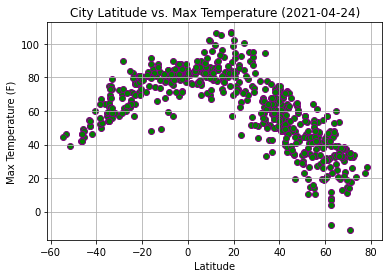

In [11]:
#plotting.... for evil... bwahahahahahahahahahaha
outputLatTemp = outputPath + "figLatTemp.png"
xAxis = cleanCityData["Lat"]
yAxis = cleanCityData["Max Temp"]

plt.scatter(xAxis, yAxis, marker = 'o', c='green', edgecolors="purple")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig(outputLatTemp)
plt.show()


#### The above graph shows that cities around 0 degrees latitude (the equator) have higher temperatures.  The further away from 0, in either direction, the max temp lowers.

## Latitude vs. Humidity Plot

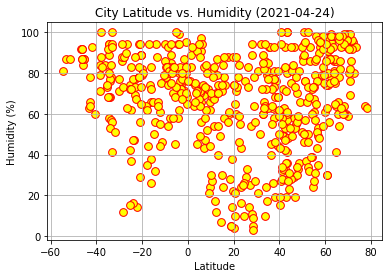

In [12]:
#plotting.... for major evil... bwahahahahahahahahahaha
outputLatHum = outputPath + "figLatHum.png"
xAxis = cleanCityData["Lat"]
yAxis = cleanCityData["Humidity"]

plt.scatter(xAxis, yAxis, marker = 'o', c='yellow', edgecolors="red", s=60)
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig(outputLatHum)
plt.show()

#### The above graph shows humidity percentage by city latitude.  The humidity percentage does not appear to be impacted by the location in relation to 0 degrees latitude.


## Latitude vs. Cloudiness Plot

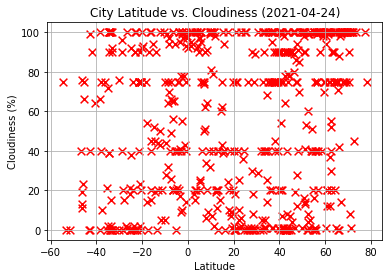

In [13]:
#plotting.... for major evil... bwahahahahahahahahahaha
outputLatCloud = outputPath + "figLatCloud.png"
xAxis = cleanCityData["Lat"]
yAxis = cleanCityData["Cloudiness"]

plt.scatter(xAxis, yAxis, marker = 'x', c='red', edgecolors="black", s=60)
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig(outputLatCloud)
plt.show()

#### The above graph shows the cloudiness by city latitude.  Based on the graph there doesn't appear to be a relationship between the two as it appears high cloudiness transverses across the latitude specturm.

## Latitude vs. Wind Speed Plot

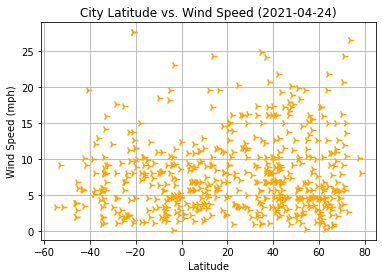

In [14]:
#plotting.... for major evil... bwahahahahahahahahahaha
outputLatWind = outputPath + "figLatWind.png"
xAxis = cleanCityData["Lat"]
yAxis = cleanCityData["Wind Speed"]

plt.scatter(xAxis, yAxis, marker = '4', c='orange', edgecolors="blue", s=60)
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig(outputLatWind)
plt.show()

#### The above graph shows the wind speed by city latitude.  Based on the graph there doesn't appear to be a relationship between the two as it appears wind speeds transverse across the latitude specturm.

## Linear Regression

#### Methods for efficiency
(I was a little bored and hoped I could show off a little)

In [15]:
def linearStatement (someNum):
    numCheck = abs(someNum[0])
    outputStr = f"The r-value is: {round(someNum[0],3)}. This designates "
    
    #type of relationship
    if someNum[0] < 0:
        negPos = "negative"
    else:
        negPos = "positive"
        
    #correlation syntax    
    if numCheck >= .7: # i believe this was in the class slides for day 3.
        outputStr += f"a {negPos} strong relationship."
    elif numCheck >= .5:
        outputStr += f"a {negPos} moderate relationship."
    elif numCheck >= .3:
        outputStr += f"a {negPos} weak relationship."
    else:
        outputStr += "either no or very weak relationship."
    
    return outputStr
    
#print(linearStatement([-.53])) #sanity check

In [16]:
#method to create the different plots
def createPlot (xCol, yCol, xLab, yLab, title, outFile):
    
    #get plot (dot) data
    dotX = xCol
    dotY = yCol

    #get line for linearness
    (slope, intercept, rvalue, pvalue, stderr) = linregress(dotX, dotY)
    regressVals = dotX * slope + intercept
    lineEQ =  "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))

    #create annotation coordinates
    xStart = int(dotX.min())
    yStart = int(dotY.min()) + 3
    if xStart < 0:
        xStart = -30
        
    #calculate correlation coeff
    corCoef = st.pearsonr(dotX, dotY)

    #print the r value
    print(linearStatement(corCoef)+"\n")

    #plot
    plt.scatter(dotX, dotY, marker= 'o', c="purple", s=60, edgecolors="purple")
    plt.plot(dotX,regressVals,"r-")
    plt.xlabel(xLab)
    plt.ylabel(yLab)
    plt.title(title)
    
    #annotating line
    plt.annotate(lineEQ,(xStart,yStart),fontsize=13,color="red")
    
    #saving figure
    plt.savefig(outputFile)

    plt.show()
    
#createPlot(nHemiDF["Lat"],nHemiDF["Max Temp"],"Latitude","Max Temp") #sanity check

In [17]:
#create dataframes for the different hemispheres
nHemiDF = cleanCityData.loc[(weatherDF["Lat"] >= 0)]
sHemiDF = cleanCityData.loc[(weatherDF["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.843. This designates a negative strong relationship.



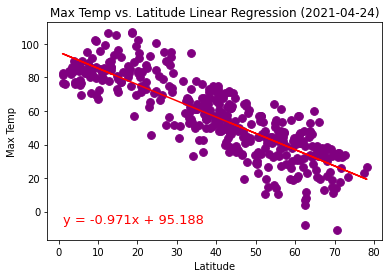

In [18]:
outputFile = outputPath + "figNorthLatTempLine.png"

createPlot(nHemiDF["Lat"]
           ,nHemiDF["Max Temp"]
           ,"Latitude"
           ,"Max Temp"
           ,f"Max Temp vs. Latitude Linear Regression ({today})"
           ,outputFile)

#### The above graph shows the max temps by latitude for the northen hemisphere.  There appears to be a negative strong relationship between the two.  As the latitude moves away from 0 degrees (the equator) the lower the max temps become.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.782. This designates a positive strong relationship.



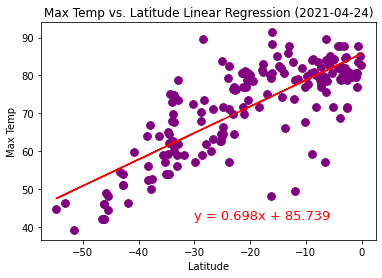

In [19]:
outputFile = outputPath + "figSouthLatTempLine.png"

createPlot(sHemiDF["Lat"] 
           ,sHemiDF["Max Temp"]
           ,"Latitude"
           ,"Max Temp"
           ,f"Max Temp vs. Latitude Linear Regression ({today})"
           ,outputFile)

#### The above graph shows the max temps by latitude for the southern hemisphere.  This graph also has a strong relationship between the two, but in a positive correlation.  This means as we approach 0 degrees from a negative latitude the max temps increase, giving us that nice upward slope in our regression line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.245. This designates either no or very weak relationship.



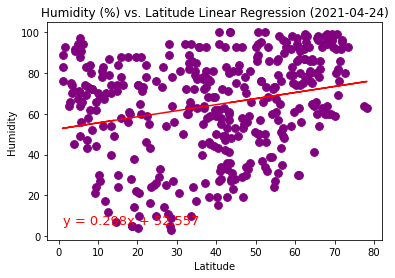

In [20]:
outputFile = outputPath + "figNorthLatHumLine.png"

createPlot(nHemiDF["Lat"]
           ,nHemiDF["Humidity"]
           ,"Latitude"
           ,"Humidity"
           ,f"Humidity (%) vs. Latitude Linear Regression ({today})"
           ,outputFile)

#### This graph shows us the humidity % versus latitude for the northern hemisphere.  Because our r-value is .25, we can say that there is either a very weak or no relationship.  This means regardless of where we are in the northern hemisphere, we cannot expect the humidity to be at a specific level. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.073. This designates either no or very weak relationship.



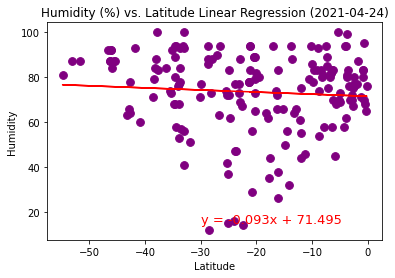

In [21]:
outputFile = outputPath + "figSouthLatHumLine.png"

createPlot(sHemiDF["Lat"]
           ,sHemiDF["Humidity"]
           ,"Latitude"
           ,"Humidity"
           ,f"Humidity (%) vs. Latitude Linear Regression ({today})"
           ,outputFile)

#### This graph shows us the humidity percentage versus latitude for the southern hemisphere.  Because our r-value is -.073, we can say that there is either a very weak or no relationship.  This means regardless of where we are in the southern hemisphere, we also cannot expect the humidity to be at a specific level. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.189. This designates either no or very weak relationship.



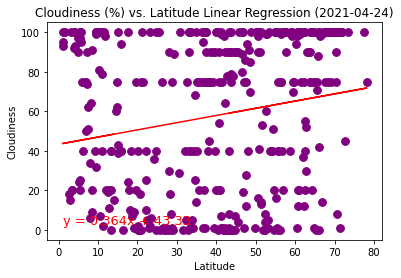

In [22]:
outputFile = outputPath + "figNorthLatCloudLine.png"

createPlot(nHemiDF["Lat"]
           ,nHemiDF["Cloudiness"]
           ,"Latitude"
           ,"Cloudiness"
           ,f"Cloudiness (%) vs. Latitude Linear Regression ({today})"
           ,outputFile)

#### This graph shows us the cloudiness % versus latitude for the northern hemisphere.  Because our r-value is .19, we can say that there is either a very weak or no relationship between the two.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.177. This designates either no or very weak relationship.



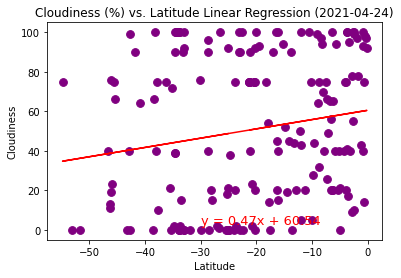

In [23]:
outputFile = outputPath + "figSouthLatCloudLine.png"

createPlot(sHemiDF["Lat"]
           ,sHemiDF["Cloudiness"]
           ,"Latitude"
           ,"Cloudiness"
           ,f"Cloudiness (%) vs. Latitude Linear Regression ({today})"
           ,outputFile)

#### This graph shows us the cloudiness % versus latitude for the southern hemisphere.  Because our r-value is .177, we can say that there is either a very weak or no relationship between the two.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03. This designates either no or very weak relationship.



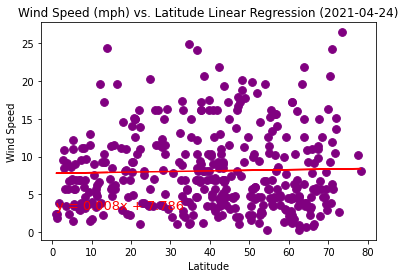

In [24]:
outputFile = outputPath + "figNorthLatWindLine.png"

createPlot(nHemiDF["Lat"]
           ,nHemiDF["Wind Speed"]
           ,"Latitude"
           ,"Wind Speed"
           ,f"Wind Speed (mph) vs. Latitude Linear Regression ({today})"
           ,outputFile)

#### This graph shows us the wind speed in miles per hour versus latitude for the northern hemisphere.  Because our r-value is .03, we can say that there is either a very weak or no relationship between the two.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011. This designates either no or very weak relationship.



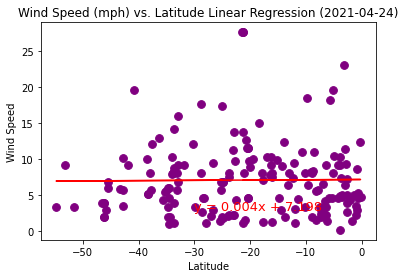

In [25]:
outputFile = outputPath + "figSouthLatWindLine.png"

createPlot(sHemiDF["Lat"]
           ,sHemiDF["Wind Speed"],
           "Latitude"
           ,"Wind Speed"
           ,f"Wind Speed (mph) vs. Latitude Linear Regression ({today})"
           ,outputFile)

#### This graph shows us the wind speed in mph versus latitude for the southern hemisphere.  Because our r-value is .01, we can say that there is either a very weak or no relationship between the two.